In [65]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm import tqdm

import PLred.fit as fit
from PLred.imgrecon import locs2image

In [71]:
import importlib
importlib.reload(fit)

<module 'PLred.fit' from '/home/first/yjkim/PLred/PLred/fit.py'>

## Making the matrix

In [67]:
model_file = '../example_model_couplingmap/betcmi_20240917_polymodel.fits'
image_ngrid = 32
image_fov = 20 # mas
n_trim = 4

fitter = fit.PLMapFit(model_file = model_file, image_ngrid = image_ngrid, 
                      image_fov = image_fov, n_trim = n_trim)

loading model


In [117]:
specind = 50
fibinds = np.arange(38) #np.arange(38) # np.arange(25,30) #

fitter.prepare_data(specind, fibinds)
fitter.make_matrix(specind, fibinds)


1024it [00:23, 43.18it/s]

all the fiber indices are used. saving the matrix to mat_full


In [82]:
fitter.save_matrix_to_file('matrix_specind%d.fits' % specind)

Matrix saved to  matrix_specind90.fits


Once the matrix is saved, this can be loaded without having to compute again

## Loading the matrix and doing image reconstruction

In [135]:
fitter2 = fit.PLMapFit(matrix_file = 'matrices/matrix_specind112.fits')

loading model
Matrix loaded from  matrices/matrix_specind112.fits specind 112


In [136]:
fitter2.mat_specind

112

In [137]:

fibinds = np.arange(38)

fitter2.prepare_data(fibinds)
fitter2.subsample_matrix(fibinds)

preparing data for specind 112


In [138]:
ini_temp = 1e3 #1
tau = 3e4
gamma = 5064 # 5000
n_element = 100 #50
target_chi2 = 1e-4
fitter2.store_hyperparams(ini_temp, tau, gamma, n_element, target_chi2)

100%|██████████| 1000/1000 [00:05<00:00, 181.36it/s]


Done


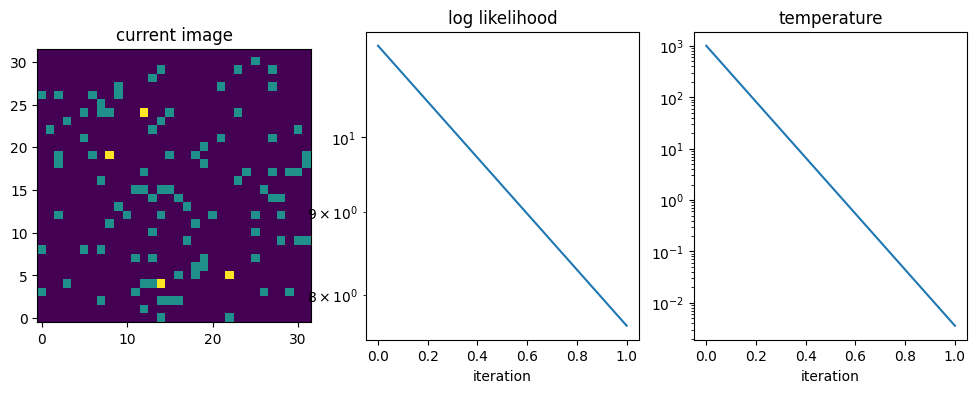

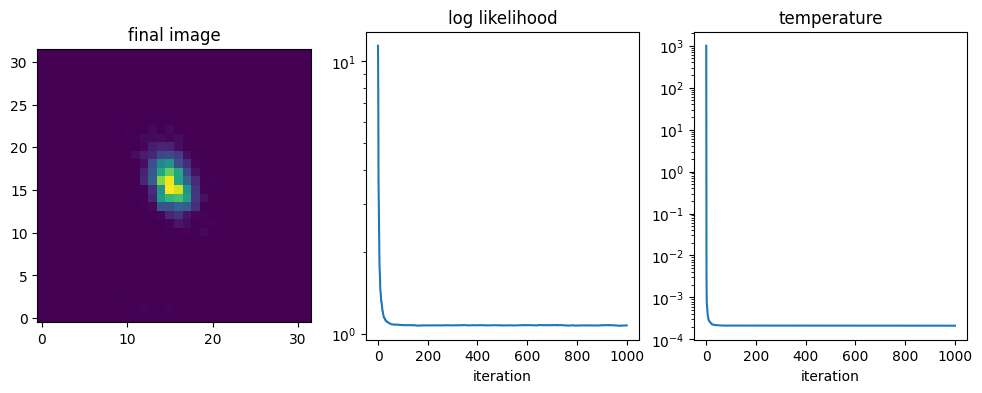

In [139]:
# fitter.make_matrix(specind, fibinds)

rc = fitter2.run(niter = 1000, radius = 20, plot_every = 5000)

In [140]:
rc.current_ll

np.float64(1.0746716283008582)

In [110]:
rc.current_ll

np.float64(0.9050525267900401)

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:08<00:00, 223.01it/s]


Done


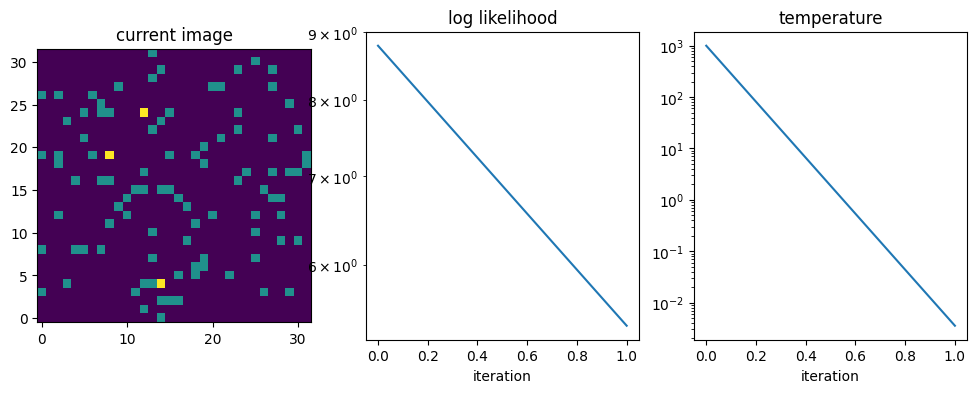

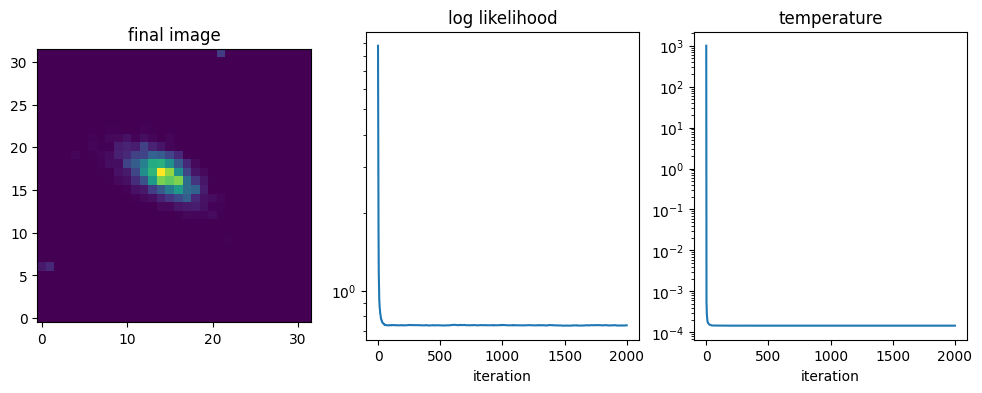

In [43]:
# fitter.make_matrix(specind, fibinds)

rc = fitter2.run(niter = 2000, radius = 20, plot_every = 5000)

In [ ]:
np.shape(fitter.mat)

In [ ]:
np.shape(fitter.mapmodel.normdata)

In [ ]:
1862/38

In [ ]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 130
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

dx = -4*np.cos(np.radians(pad))
dy = -4*np.sin(np.radians(pad))
plt.plot([xc, xc+dx], [yc, yc+dy], 'r')
plt.text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

plt.plot([xc, xc+dy], [yc, yc-dx], 'r')
plt.text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


In [ ]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 130
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

dx = -4*np.cos(np.radians(pad))
dy = -4*np.sin(np.radians(pad))
plt.plot([xc, xc+dx], [yc, yc+dy], 'r')
plt.text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

plt.plot([xc, xc+dy], [yc, yc-dx], 'r')
plt.text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


Text(12.924809625449729, 19.785836503510563, 'disk')

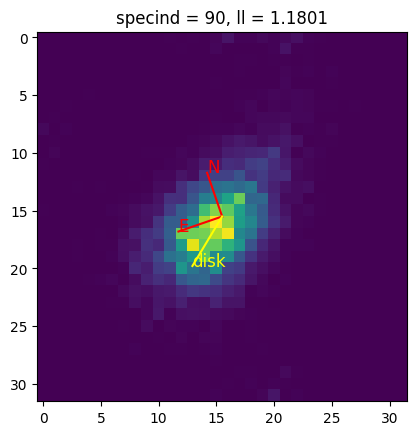

In [98]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 130
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

dx = -4*np.cos(np.radians(pad))
dy = -4*np.sin(np.radians(pad))
plt.plot([xc, xc+dx], [yc, yc+dy], 'r')
plt.text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

plt.plot([xc, xc+dy], [yc, yc-dx], 'r')
plt.text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


In [ ]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 130
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

dx = -4*np.cos(np.radians(pad))
dy = -4*np.sin(np.radians(pad))
plt.plot([xc, xc+dx], [yc, yc+dy], 'r')
plt.text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

plt.plot([xc, xc+dy], [yc, yc-dx], 'r')
plt.text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


In [ ]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 133
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

dx = -4*np.cos(np.radians(pad))
dy = -4*np.sin(np.radians(pad))
plt.plot([xc, xc+dx], [yc, yc+dy], 'r')
plt.text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

plt.plot([xc, xc+dy], [yc, yc-dx], 'r')
plt.text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


In [ ]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 133
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

dx = -4*np.cos(np.radians(pad))
dy = -4*np.sin(np.radians(pad))
plt.plot([xc, xc+dx], [yc, yc+dy], 'r')
plt.text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

plt.plot([xc, xc+dy], [yc, yc-dx], 'r')
plt.text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


In [ ]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 133
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

dx = -4*np.cos(np.radians(pad))
dy = -4*np.sin(np.radians(pad))
plt.plot([xc, xc+dx], [yc, yc+dy], 'r')
plt.text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

plt.plot([xc, xc+dy], [yc, yc-dx], 'r')
plt.text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


In [ ]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 131
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


# disk_PA = 143
# pad = 71
# xc, yc = 15.5, 15.5
# dx_disk = -5*np.cos(np.radians(pad - disk_PA))
# dy_disk = -5*np.sin(np.radians(pad - disk_PA))

# plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
# plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


In [ ]:

for specind in np.arange(103, 112):
    fibinds = np.arange(38)

    fitter.prepare_data(specind, fibinds)
    fitter.make_matrix(specind, fibinds)
    
    rc = fitter.run(niter = 2000, radius = 10, plot_every = 5000)

    fig = plt.figure(figsize=(5,5))
    plt.imshow(locs2image(rc.post_locs, rc.axis_len),
            extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
            origin='upper')
    plt.axvline(0, color='white', alpha=0.3)
    plt.axhline(0, color='white', alpha=0.3)
    plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
    plt.xlabel('x (mas)')
    plt.ylabel('y (mas)')

    fig.savefig('results/specind_%d.png' % specind)
    plt.show()
    
    np.save('results/specind_%d.npy' % specind, locs2image(rc.post_locs, rc.axis_len))

In [ ]:

for specind in np.arange(112, 120):
    fibinds = np.arange(38)

    fitter.prepare_data(specind, fibinds)
    fitter.make_matrix(specind, fibinds)
    
    rc = fitter.run(niter = 2000, radius = 10, plot_every = 5000)

    fig = plt.figure(figsize=(5,5))
    plt.imshow(locs2image(rc.post_locs, rc.axis_len),
            extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
            origin='upper')
    plt.axvline(0, color='white', alpha=0.3)
    plt.axhline(0, color='white', alpha=0.3)
    plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
    plt.xlabel('x (mas)')
    plt.ylabel('y (mas)')

    fig.savefig('results/specind_%d.png' % specind)
    plt.show()
    
    np.save('results/specind_%d.npy' % specind, locs2image(rc.post_locs, rc.axis_len))

In [ ]:

for specind in np.arange(95, 103):
    fibinds = np.arange(38)

    fitter.prepare_data(specind, fibinds)
    fitter.make_matrix(specind, fibinds)
    
    rc = fitter.run(niter = 2000, radius = 10, plot_every = 5000)

    fig = plt.figure(figsize=(5,5))
    plt.imshow(locs2image(rc.post_locs, rc.axis_len),
            extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
            origin='upper')
    plt.axvline(0, color='white', alpha=0.3)
    plt.axhline(0, color='white', alpha=0.3)
    plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
    plt.xlabel('x (mas)')
    plt.ylabel('y (mas)')

    fig.savefig('results/specind_%d.png' % specind)
    plt.show()
    
    np.save('results/specind_%d.npy' % specind, locs2image(rc.post_locs, rc.axis_len))

In [ ]:
rc.current_ll

In [ ]:
rc.final_vec